<div style="background-color: Cream; padding: 15px; border-radius: 10px;">
    <p style="color: black; font-size: 15px; font-weight: bold;">
         Import Libraries
   </p>
</div>



In [113]:
pip install twython 

Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud




nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
         Load Data
   </p>
</div>


In [116]:
df = pd.read_csv("sentimentdataset.csv")

In [117]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [118]:
#Summary of the missing values
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [119]:
df.duplicated().sum()

0

In [120]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [121]:
# Prints the number of distinct (unique) values in each column
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Drop Columns
   </p>
</div>


In [122]:
df.drop(['Unnamed: 0.1','Unnamed: 0','Timestamp','User','Platform','Hashtags','Retweets','Likes','Country','Year','Month','Day','Hour'],axis=1,inplace=True)
df.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Text preprocessing and cleaning 
        
   </p>
</div>


In [123]:
#Text preprocessing and cleaning 
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    #Tokenization
    tokens = word_tokenize(text)
    
    #Stems the tokens and removes stop words.
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)
print(df)

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728  Attending a surprise birthday party organized ...       Happy    
729  Successfully fundraising for a school charity ...       Happy    
730  Participating in a multicultural festival, cel...       Happy    
731  Organizing a virtual talent show during challe...       Happy    

                                            Clean_Text  
0                                enjoy beauti day park  
1                                

In [124]:
df1 = df.copy()

In [125]:
#Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


In [126]:
# Sentence type classification
sentences = df['Clean_Text'].apply(sent_tokenize)

def sentence_type_analysis(sentence):
    sentences = sent_tokenize(sentence)
    types = []
    for sent in sentences:
        tokenized = nltk.word_tokenize(sent)
        tag = nltk.pos_tag(tokenized)
        if '?' in sent:
            types.append('interrogative')
        elif '!' in sent:
            types.append('exclamatory')
        else:
            types.append('declarative')
    return types

df['Sentence_Type'] = df['Text'].apply(sentence_type_analysis)
print(df[['Text', 'Sentence_Type']])


                                                  Text  \
0     Enjoying a beautiful day at the park!        ...   
1     Traffic was terrible this morning.           ...   
2     Just finished an amazing workout! 💪          ...   
3     Excited about the upcoming weekend getaway!  ...   
4     Trying out a new recipe for dinner tonight.  ...   
..                                                 ...   
727  Collaborating on a science project that receiv...   
728  Attending a surprise birthday party organized ...   
729  Successfully fundraising for a school charity ...   
730  Participating in a multicultural festival, cel...   
731  Organizing a virtual talent show during challe...   

                  Sentence_Type  
0                 [exclamatory]  
1                 [declarative]  
2    [exclamatory, declarative]  
3                 [exclamatory]  
4                 [declarative]  
..                          ...  
727  [declarative, exclamatory]  
728  [declarative, exclamatory]

In [127]:
#POS and NER

# Load spaCy's English tokenizer
nlp = spacy.load('en_core_web_sm')

# Function for POS tagging and NER
def pos_ner_analysis(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
    return pos_tags, ner_tags

# Example usage
text = "Example sentence for POS tagging and NER."
pos_tags, ner_tags = pos_ner_analysis(text)
print("POS Tags:", pos_tags)
print("NER Tags:", ner_tags)

# Apply to DataFrame column
df['POS_Tags'], df['NER_Tags'] = zip(*df['Text'].apply(pos_ner_analysis))
print(df[['Text', 'POS_Tags', 'NER_Tags']])


POS Tags: [('Example', 'NOUN'), ('sentence', 'NOUN'), ('for', 'ADP'), ('POS', 'PROPN'), ('tagging', 'NOUN'), ('and', 'CCONJ'), ('NER', 'PROPN'), ('.', 'PUNCT')]
NER Tags: [('NER', 'ORG')]
                                                  Text  \
0     Enjoying a beautiful day at the park!        ...   
1     Traffic was terrible this morning.           ...   
2     Just finished an amazing workout! 💪          ...   
3     Excited about the upcoming weekend getaway!  ...   
4     Trying out a new recipe for dinner tonight.  ...   
..                                                 ...   
727  Collaborating on a science project that receiv...   
728  Attending a surprise birthday party organized ...   
729  Successfully fundraising for a school charity ...   
730  Participating in a multicultural festival, cel...   
731  Organizing a virtual talent show during challe...   

                                              POS_Tags                NER_Tags  
0    [( , SPACE), (Enjoying, VERB)

In [128]:
#Count vowels
def count_vowels(text):
    vowels = 'aeiouAEIOU'
    return sum(1 for char in text if char in vowels)

df['Vowel_Count'] = df['Text'].apply(count_vowels)
print(df[['Text', 'Vowel_Count']])


                                                  Text  Vowel_Count
0     Enjoying a beautiful day at the park!        ...           13
1     Traffic was terrible this morning.           ...            9
2     Just finished an amazing workout! 💪          ...           11
3     Excited about the upcoming weekend getaway!  ...           16
4     Trying out a new recipe for dinner tonight.  ...           13
..                                                 ...          ...
727  Collaborating on a science project that receiv...           38
728  Attending a surprise birthday party organized ...           30
729  Successfully fundraising for a school charity ...           30
730  Participating in a multicultural festival, cel...           35
731  Organizing a virtual talent show during challe...           28

[732 rows x 2 columns]


In [129]:
#Dependency parsing
def dependency_parsing(text):
    doc = nlp(text)
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]
    return dependencies

# Example usage
text = "Dependency parsing example sentence."
dependencies = dependency_parsing(text)
print("Dependencies:", dependencies)

# Apply to DataFrame column
df['Dependencies'] = df['Text'].apply(dependency_parsing)
print(df[['Text', 'Dependencies']])


Dependencies: [('Dependency', 'ROOT', 'Dependency'), ('parsing', 'acl', 'Dependency'), ('example', 'compound', 'sentence'), ('sentence', 'dobj', 'parsing'), ('.', 'punct', 'Dependency')]
                                                  Text  \
0     Enjoying a beautiful day at the park!        ...   
1     Traffic was terrible this morning.           ...   
2     Just finished an amazing workout! 💪          ...   
3     Excited about the upcoming weekend getaway!  ...   
4     Trying out a new recipe for dinner tonight.  ...   
..                                                 ...   
727  Collaborating on a science project that receiv...   
728  Attending a surprise birthday party organized ...   
729  Successfully fundraising for a school charity ...   
730  Participating in a multicultural festival, cel...   
731  Organizing a virtual talent show during challe...   

                                          Dependencies  
0    [( , dep, Enjoying), (Enjoying, ROOT, Enjoying...  
1 

In [130]:
#Topic Modeling
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Tokenize the cleaned text (assuming 'Clean_Text' column exists)
tokenized_text = df['Clean_Text'].apply(lambda x: x.split())

# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_text)

# Filter out extreme cases and common stopwords
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Print topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}:\n{topic}\n")

# Assign topics to each document
df['Topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
print(df[['Clean_Text', 'Topic']])


Topic 0:
0.059*"new" + 0.034*"explor" + 0.022*"world" + 0.018*"art" + 0.017*"learn" + 0.017*"adventur" + 0.016*"garden" + 0.014*"thought" + 0.013*"tale" + 0.013*"start"

Topic 1:
0.026*"excit" + 0.019*"creativ" + 0.019*"project" + 0.019*"echo" + 0.018*"heart" + 0.016*"upcom" + 0.016*"solitud" + 0.015*"garden" + 0.015*"kind" + 0.014*"wit"

Topic 2:
0.032*"emot" + 0.031*"friend" + 0.030*"laughter" + 0.024*"joy" + 0.022*"love" + 0.018*"play" + 0.017*"paint" + 0.017*"moment" + 0.016*"concert" + 0.016*"symphoni"

Topic 3:
0.035*"danc" + 0.025*"feel" + 0.022*"whisper" + 0.021*"hope" + 0.020*"life" + 0.019*"shatter" + 0.019*"embrac" + 0.018*"dream" + 0.017*"old" + 0.016*"like"

Topic 4:
0.044*"challeng" + 0.034*"day" + 0.027*"natur" + 0.026*"achiev" + 0.023*"beauti" + 0.023*"seren" + 0.020*"person" + 0.017*"peac" + 0.017*"success" + 0.016*"tranquil"

                                            Clean_Text  Topic
0                                enjoy beauti day park      4
1                   

In [131]:
#TF IDF
corpus = df['Clean_Text'].tolist()

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the corpus
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

# Concatenate the TF-IDF DataFrame with the original DataFrame
df = pd.concat([df, df_tfidf], axis=1)
print(df_tfidf)



     abstract  abyss  academ  accept  accident  accomplish  achiev  act  \
0         0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
1         0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
2         0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
3         0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
4         0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
..        ...    ...     ...     ...       ...         ...     ...  ...   
727       0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
728       0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
729       0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
730       0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   
731       0.0    0.0     0.0     0.0       0.0         0.0     0.0  0.0   

     action  activ  ...   workout  workshop  world  wound  wrap  write  wrong  \
0       0.0    0.0

<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Visualization
        
   </p>
</div>

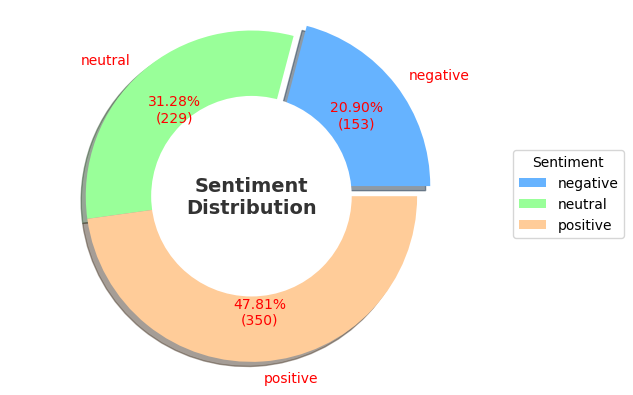

In [132]:
#Pie chart visualizes the distribution of sentiments

colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)  

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()

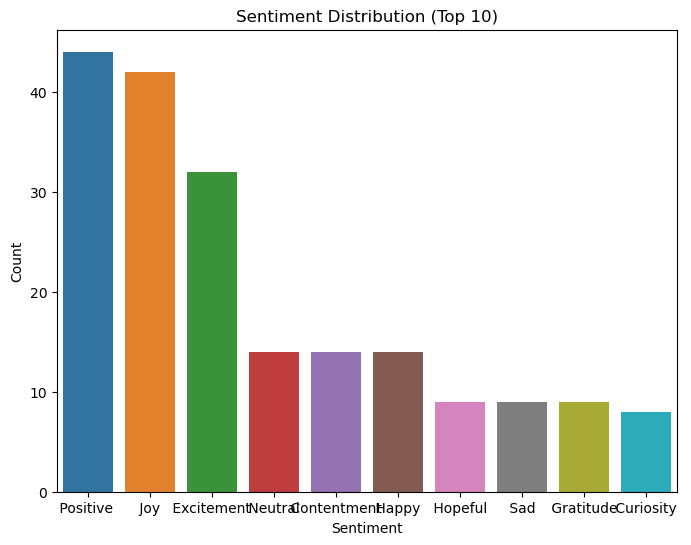

In [133]:
# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Identify the top 10 sentiments
top_10_sentiments = sentiment_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 sentiments
top_10_df = df[df['Sentiment'].isin(top_10_sentiments)]

# Visualize the distribution of the top 10 sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=top_10_df, order=top_10_sentiments)
plt.title('Sentiment Distribution (Top 10)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

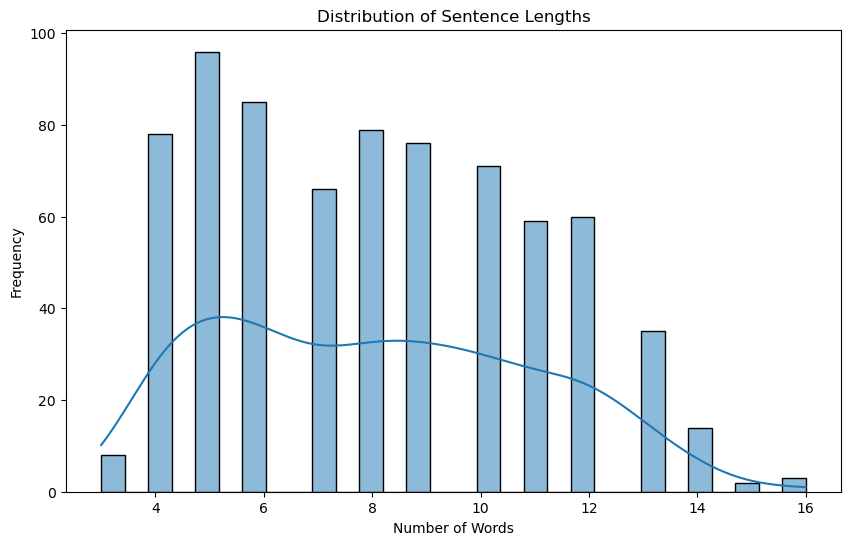

In [134]:
# Calculate the number of words in each processed text
df['word_count'] = df['Clean_Text'].apply(lambda x: len(x.split()))

# Plotting the distribution of sentence lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True, bins=30)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Word Cloud 
        
   </p>
</div>

In [135]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')


,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


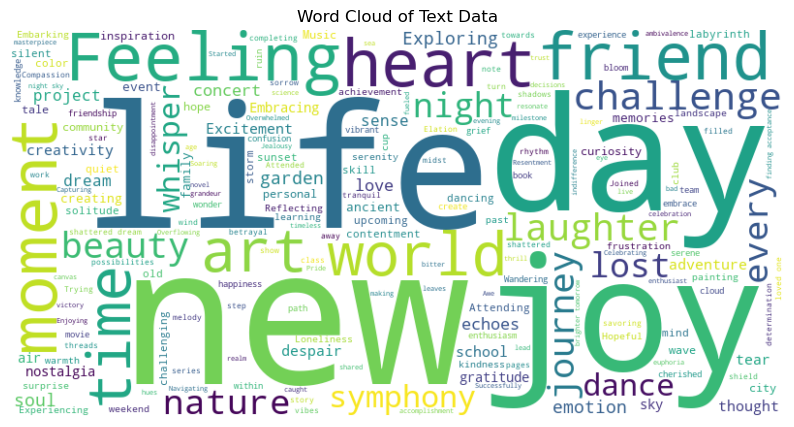

In [136]:
# Combine all processed text into a single string
all_text = ' '.join(df['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        Data Preparation
   </p>
</div>


In [137]:
df2 = df1.copy()

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Split Data
   </p>
</div>


In [139]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
         Modeling
   </p>
</div>


In [141]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Passive Aggressive Classifier
   </p>
</div>


In [142]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [143]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [144]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.81      0.80        32
     neutral       0.73      0.55      0.62        55
    positive       0.67      0.82      0.74        60

    accuracy                           0.71       147
   macro avg       0.73      0.72      0.72       147
weighted avg       0.72      0.71      0.71       147



<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Logistic Classifier
   </p>
</div>


In [145]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [146]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [147]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)


Logistic Regression Results:
Accuracy: 0.6326530612244898
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.50      0.64        32
     neutral       0.80      0.36      0.50        55
    positive       0.55      0.95      0.70        60

    accuracy                           0.63       147
   macro avg       0.75      0.60      0.61       147
weighted avg       0.72      0.63      0.61       147



<div style="background-color: brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Multinomial Naive Bayes classifier
        
   </p>
</div>

In [148]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_test = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep_test = classification_report(y_test, y_pred)

# Print results
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)


Test Set Results:
Accuracy: 0.6190476190476191
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.38      0.55        32
     neutral       0.90      0.35      0.50        55
    positive       0.53      1.00      0.69        60

    accuracy                           0.62       147
   macro avg       0.81      0.57      0.58       147
weighted avg       0.77      0.62      0.59       147



<div style="background-color: Brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Best Modeling : Passive Aggressive Classifier
   </p>
</div>



<div style="background-color: Brown; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Hyperparameters
   </p>
</div>



In [158]:
param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

In [159]:
pac_classifier = PassiveAggressiveClassifier(random_state=42)

randomized_search = RandomizedSearchCV(pac_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

-- Epoch 1
Norm: 9.92, NNZs: 1467, Bias: -0.464986, T: 468, Avg. loss: 0.522383
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 13.91, NNZs: 1496, Bias: -0.370255, T: 936, Avg. loss: 0.189774
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15.56, NNZs: 1505, Bias: -0.347198, T: 1404, Avg. loss: 0.071065
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 16.15, NNZs: 1505, Bias: -0.348670, T: 1872, Avg. loss: 0.023560
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 16.34, NNZs: 1505, Bias: -0.350289, T: 2340, Avg. loss: 0.006908
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 16.39, NNZs: 1505, Bias: -0.351797, T: 2808, Avg. loss: 0.001933
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 16.40, NNZs: 1505, Bias: -0.352221, T: 3276, Avg. loss: 0.000385
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 16.40, NNZs: 1505, Bias: -0.352292, T: 3744, Avg. loss: 0.000070
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 16.40, NNZs: 1505, Bias: -0.352296, T: 4212, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, estimator=PassiveAggressiveClassifier(random_state=42),
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'fit_intercept': [True, False],
                                        'shuffle': [True, False],
                                        'verbose': [0, 1]},
                   random_state=42, scoring='accuracy')

In [160]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}

In [161]:
best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)
best_pac_classifier_randomized.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42, shuffle=False)

In [162]:
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

In [163]:
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [164]:
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)


Best PassiveAggressiveClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'C': 1.0}
Accuracy: 0.7278911564625851
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.81      0.83        32
     neutral       0.74      0.56      0.64        55
    positive       0.68      0.83      0.75        60

    accuracy                           0.73       147
   macro avg       0.75      0.74      0.74       147
weighted avg       0.73      0.73      0.72       147



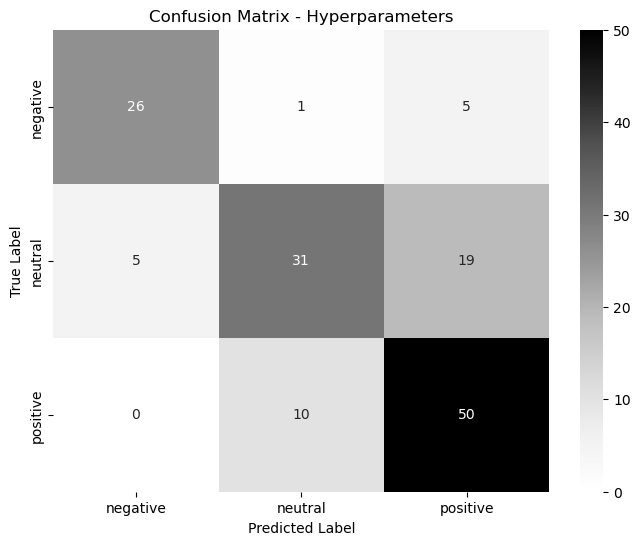

In [157]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greys', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
